In [2]:
pip install pandas-datareader

     |████████████████████████████████| 109 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas_datareader as pdr
key="c12aea083e00a3db65997ac3a2608da735c7f645"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-01 00:00:00+00:00,109.49,110.94,109.03,110.365,37086862,25.762143,26.103316,25.653908,25.968023,148347448,0.0,1.0
1,AAPL,2016-12-02 00:00:00+00:00,109.90,110.09,108.85,109.170,26527997,25.858612,25.903318,25.611556,25.686849,106111988,0.0,1.0
2,AAPL,2016-12-05 00:00:00+00:00,109.11,110.03,108.25,110.000,34324540,25.672732,25.889200,25.470380,25.882142,137298160,0.0,1.0
3,AAPL,2016-12-06 00:00:00+00:00,109.95,110.36,109.19,109.500,26195462,25.870377,25.966847,25.691555,25.764496,104781848,0.0,1.0
4,AAPL,2016-12-07 00:00:00+00:00,111.03,111.19,109.16,109.260,29998719,26.124493,26.162139,25.684496,25.708025,119994876,0.0,1.0


In [2]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-11-22 00:00:00+00:00,161.02,165.70,161.0000,161.680,117467889,161.02,165.70,161.0000,161.680,117467889,0.0,1.0
1253,AAPL,2021-11-23 00:00:00+00:00,161.41,161.80,159.0601,161.120,96041899,161.41,161.80,159.0601,161.120,96041899,0.0,1.0
1254,AAPL,2021-11-24 00:00:00+00:00,161.94,162.14,159.6400,160.750,69463623,161.94,162.14,159.6400,160.750,69463623,0.0,1.0
1255,AAPL,2021-11-26 00:00:00+00:00,156.81,160.45,156.3600,159.565,76959752,156.81,160.45,156.3600,159.565,76959752,0.0,1.0
1256,AAPL,2021-11-29 00:00:00+00:00,160.24,161.19,158.7901,159.370,88748217,160.24,161.19,158.7901,159.370,88748217,0.0,1.0


In [4]:
df1=df.reset_index()['close']
df1

0       109.49
1       109.90
2       109.11
3       109.95
4       111.03
         ...  
1252    161.02
1253    161.41
1254    161.94
1255    156.81
1256    160.24
Name: close, Length: 1257, dtype: float64

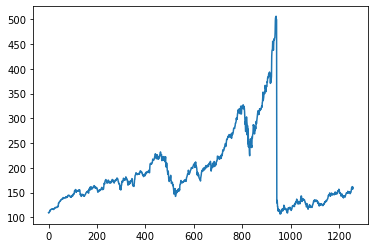

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
import numpy as np
df1

0       109.49
1       109.90
2       109.11
3       109.95
4       111.03
         ...  
1252    161.02
1253    161.41
1254    161.94
1255    156.81
1256    160.24
Name: close, Length: 1257, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)

[[0.00663745]
 [0.00766437]
 [0.00568566]
 ...
 [0.13800877]
 [0.12515967]
 [0.13375078]]


In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(817, 440)

In [11]:
train_data

array([[0.00663745],
       [0.00766437],
       [0.00568566],
       [0.00778961],
       [0.01049468],
       [0.0132248 ],
       [0.01780839],
       [0.01618034],
       [0.02091421],
       [0.02091421],
       [0.02249217],
       [0.02286788],
       [0.02454602],
       [0.02532248],
       [0.025598  ],
       [0.02366938],
       [0.02424546],
       [0.02609894],
       [0.02484659],
       [0.02477145],
       [0.02249217],
       [0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.064

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)


(339, 100)
(339,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 419ms/step - loss: 0.0167 - val_loss: 0.0210
Epoch 2/100
12/12 [==============================] - 3s 284ms/step - loss: 0.0033 - val_loss: 0.0238
Epoch 3/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0017 - val_loss: 0.0188
Epoch 4/100
12/12 [==============================] - 4s 357ms/step - loss: 7.5003e-04 - val_loss: 0.0213
Epoch 5/100
12/12 [==============================] - 4s 338ms/step - loss: 6.1292e-04 - val_loss: 0.0209
Epoch 6/100
12/12 [==============================] - 3s 226ms/step - loss: 5.5741e-04 - val_loss: 0.0197
Epoch 7/100
12/12 [==============================] - 7s 610ms/step - loss: 5.4122e-04 - val_loss: 0.0192
Epoch 8/100
12/12 [==============================] - 5s 371ms/step - loss: 5.2591e-04 - val_loss: 0.0197
Epoch 9/100
12/12 [==============================] - 4s 311ms/step - loss: 5.1733e-04 - val_loss: 0.0188
Epoch 10/100
12/12 [==============================] - 3s 292ms/ste

In [22]:
import tensorflow as tf

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011984546626241991

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.06508431673501898

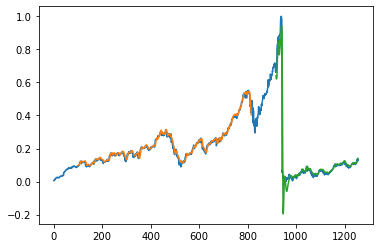

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

440

In [39]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.0958547276142768,
 0.09432686286787725,
 0.09718221665623036,
 0.1059737006887915,
 0.10429555416405759,
 0.09906073888541009,
 0.08919223544145267,
 0.09845961177207266,
 0.09658108954289293,
 0.10008766437069508,
 0.10449592986850345,
 0.10557294927989982,
 0.10001252348152787,
 0.09552911709455222,
 0.09718221665623036,
 0.09773324984345652,
 0.09688165309956168,
 0.10149029430181591,
 0.10046336881653098,
 0.100738885410144,
 0.09843456480901688,
 0.09830932999373823,
 0.09708202880400749,
 0.09773324984345652,
 0.10532247964934247,
 0.10584846587351279,
 0.1109079524107702,
 0.1085785848465873,
 0.09898559799624299,
 0.09983719474013772,
 0.10356919223544145,
 0.10737633061991234,
 0.10715090795241075,
 0.1039949906073889,
 0.10194113963681903,
 0.10459611772072633,
 0.11591734502191611,
 0.11268628678772699,
 0.11438948027551657,
 0.11724483406386974,
 0.11887288666249221,
 0.12485911083281151,
 0.1209016906700063,
 0.11829680651221039,
 0.10552285535378833,
 0.106975579211020

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.14065313]
101
1 day input [0.09432686 0.09718222 0.1059737  0.10429555 0.09906074 0.08919224
 0.09845961 0.09658109 0.10008766 0.10449593 0.10557295 0.10001252
 0.09552912 0.09718222 0.09773325 0.09688165 0.10149029 0.10046337
 0.10073889 0.09843456 0.09830933 0.09708203 0.09773325 0.10532248
 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719 0.10356919
 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735
 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169
 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201
 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782
 0.085335   0.09247339 0.09517846 0.09946149 0.10499687 0.10624922
 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976
 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087
 0.10920476 0.1101315  0.10289292 

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1257

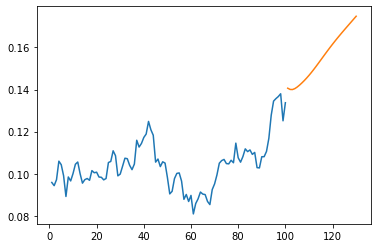

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

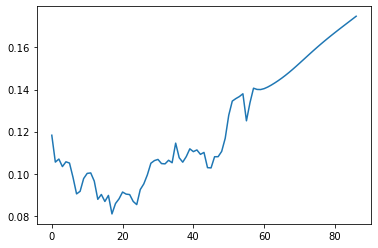

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

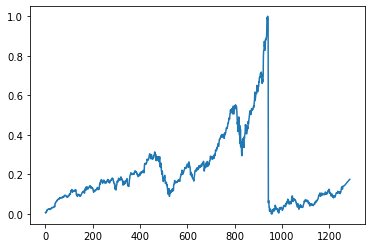

In [51]:
plt.plot(df3)